# Predict the Percentage of the students based on no. of study hours 

### 1. Problem Definition

predict the percentage of the student based on the how much time they studied using Machine learning algorithum 


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

print("Imported successfully")

Imported successfully


### 2. Load the data 

In [2]:
study_hours = pd.read_csv("student_scores.csv")
study_hours.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


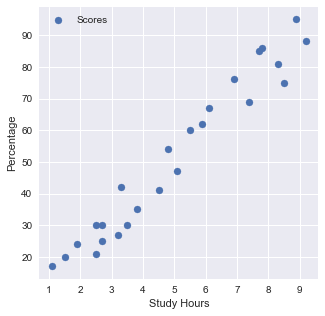

In [161]:
# visualize the data 
plt.style.use('seaborn')

fig ,ax = plt.subplots(figsize = (5,5))
ax = plt.scatter(study_hours["Hours"],study_hours["Scores"]);
plt.xlabel("Study Hours")
plt.ylabel("Percentage");
plt.legend(["Scores"]);


In [4]:
df = pd.DataFrame(study_hours)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 3. Split the data 

While spliting the data into X and y 
* `X (feature)` must be 2-dimensional 
* `y (lebel)` must be 1-dimensional 

In [145]:
# split the data into features and labels
np.random.seed(42)
X = df.iloc[:,:1].values
y = df.iloc[:,1:].values

# coverting the data into 1-dimension 
y = y.reshape(25,)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [146]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [147]:
len(X_train) , len(y_train) , len(X_test) , len(y_test) 

(20, 20, 5, 5)

### 4. Modeling / Selecting the estimator 

In [148]:
# select the model 
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train,y_train)


RandomForestRegressor()

In [149]:
model.score(X_test,y_test)

0.9778294466160586

### 5. Making Predictions 

In [150]:
y_pred = model.predict(X_test)
y_pred

array([80.3       , 27.42583333, 27.42583333, 71.9       , 62.09      ])

Making comparison between actual scores and the predicted scores 

In [151]:
y_test_flatten = y_test.reshape(5,)
y_test_flatten

array([81, 30, 21, 76, 62], dtype=int64)

In [152]:
compare = pd.DataFrame({"Actual Scores":y_test_flatten, 
                         "Predicted Scores" : y_pred})

In [153]:
compare 

,Actual Scores,Predicted Scores
0,81,80.300000
1,30,27.425833
2,21,27.425833
3,76,71.900000
4,62,62.090000


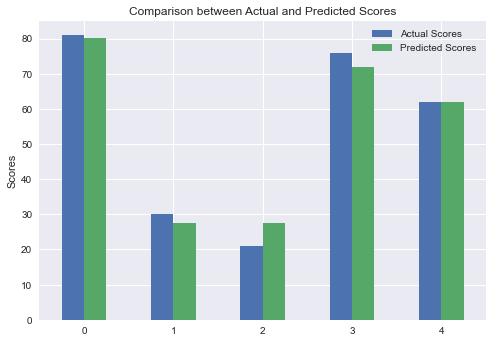

In [157]:
compare.plot(kind="bar");
plt.title("Comparison between Actual and Predicted Scores")
plt.ylabel("Scores")
plt.xticks(rotation = 0);

### 6 . Evaluating Model 

In [158]:
from sklearn.metrics import mean_absolute_error

print("Mean abosolute error for the above regression model is: ",mean_absolute_error(y_test,y_pred))

Mean abosolute error for the above regression model is:  2.778
